РК №1 Чернецов Семён ИУ5-65Б

Вариант №16



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Подключаем датасет. В исходном датасете не было категориальных признаков, поэтому категориальный признак (TAXRATE) был искусственно создан на основе столбца 'TAX'. Также для создания пропусков в категориальном признаке были искусственно созданы пропуски в признаке 'TAX'

In [14]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\HousingData.csv')

Просмотр датасета

In [15]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRATE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,NaN,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,low
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,low
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,low
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,NaN,36.2,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,NaN,22.4,low
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,low
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,low
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,low


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      496 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
 14  TAXRATE  496 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 59.4+ KB


Количество пропусков для каждого признака

In [17]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX        10
PTRATIO     0
B           0
LSTAT      20
MEDV        0
TAXRATE    10
dtype: int64

Для заполнения пропусков количественного признака был выбран признак LSTAT (Процент бедного населения). Заполнение пропущенных значений было выполнено с помощью медианы

In [18]:
df['LSTAT'].median()

11.43

In [19]:
df['LSTAT'].fillna(df['LSTAT'].median(), inplace=True)

In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRATE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,NaN,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,low
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,low
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,low
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,11.43,36.2,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,11.43,22.4,low
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,low
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,low
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,low


In [21]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX        10
PTRATIO     0
B           0
LSTAT       0
MEDV        0
TAXRATE    10
dtype: int64

Количество пропущенных значений признака LSTAT равно 0

Теперь обработаем категориальный признак TAXRATE. Для обработки пропусков была введена новая категория not stated, то есть какова ставка налога (высокая или низкая), мы определить не можем из-за отсутствия данных в признаке TAX

In [22]:
df['TAXRATE']=df['TAXRATE'].fillna('not stated')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRATE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,NaN,15.3,396.90,4.98,24.0,not stated
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,low
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,low
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,low
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,11.43,36.2,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,11.43,22.4,low
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,low
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,low
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,low


In [23]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX        10
PTRATIO     0
B           0
LSTAT       0
MEDV        0
TAXRATE     0
dtype: int64

Категориальный признак обработан

Парные диаграммы:

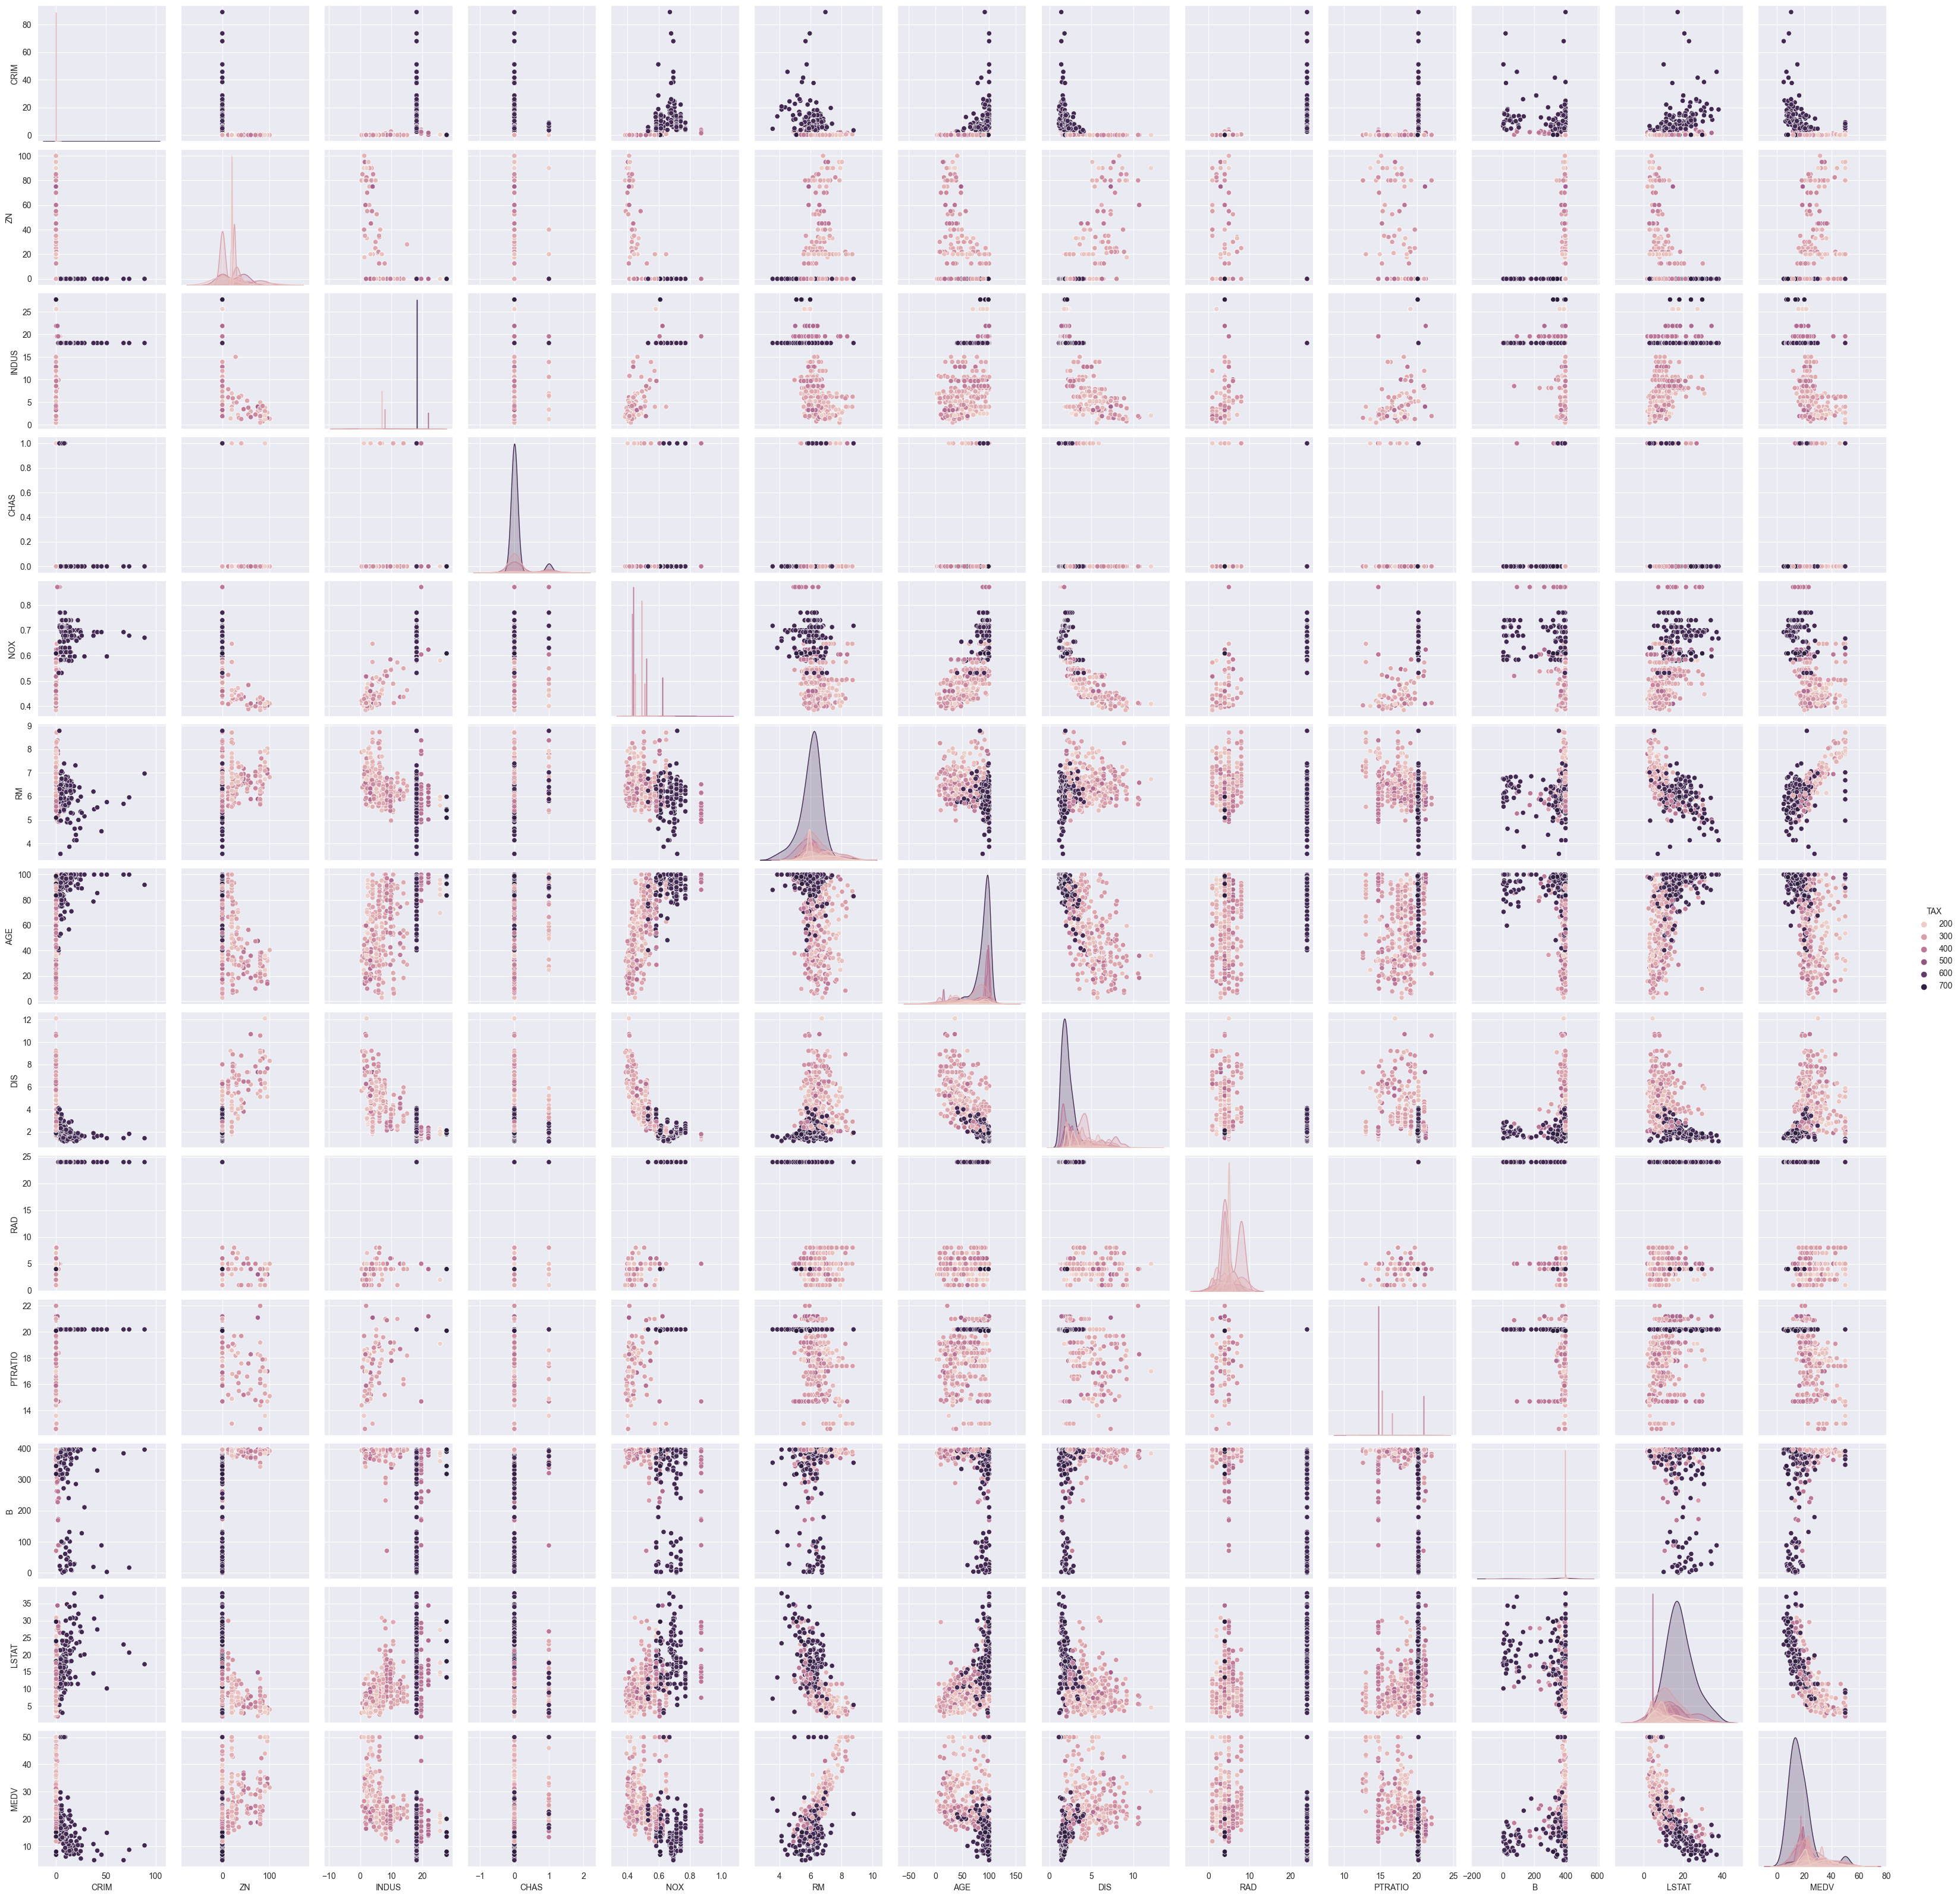

In [31]:
sns.pairplot(df, hue='TAX')

В дальнейшем построении модели машинного обучения можно использовать все количественные признаки кроме признака CHAS (там в основном значение равно 0 и признак из-за этого неинформативен)